### THIS IS WHERE WE FIND THE BEST MODEL TO DETECT THE GENDER OF A PERSON BASED SOLELY ON AN IMAGE

We will use Machine Learning(from now on ML) models since they are the most effective in this area due to the immense variety of situations a person could be in(light, position, place, etc). The models we are going to test are SVM, KNN, Decision Tree, Logistic regression, Perceptron and Naive bayes(Gaussian and Bernoulli)

In [71]:
# First we need to import all the libraries we need

import pandas as pd

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [72]:
# Second we divide the data in three groups: train, test and validation
data = pd.read_csv('C:\\Users\\valko\\PycharmProjects\\live-gender-detector\\data\\Images_data.csv')
y = data.iloc[:, 1].values
x = data.iloc[:, 2:].values
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)
train_x_2, val_x, train_y_2, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=0, shuffle=True)

Some of the classifiers have hyperparameters, which can affect the algorithm the classifier uses and therefore its performance, for that reason we use the validation group of data to choose the hyperparameters that maximize the models performance.

In [73]:
# SVM model

kernels = ["linear", "poly", "rbf", "sigmoid"]

for k in kernels:
    for c in range(1, 10, 2):
        clf = SVC(C=c, kernel=k)
        clf.fit(train_x_2, train_y_2)
        y_pred = clf.predict(val_x)
        accuracy = round(accuracy_score(val_y, y_pred) * 100, 2)
        print(f"Accuracy for k={k} & c={c}: {accuracy}%\n")

# the best performance is reached when kernel=rbf and c=3, which is 93.61%

Accuracy for k=linear & c=1: 91.29%

Accuracy for k=linear & c=3: 91.73%

Accuracy for k=linear & c=5: 91.73%

Accuracy for k=linear & c=7: 91.87%

Accuracy for k=linear & c=9: 92.31%

Accuracy for k=poly & c=1: 77.94%

Accuracy for k=poly & c=3: 77.94%

Accuracy for k=poly & c=5: 77.94%

Accuracy for k=poly & c=7: 78.08%

Accuracy for k=poly & c=9: 77.94%

Accuracy for k=rbf & c=1: 92.89%

Accuracy for k=rbf & c=3: 93.61%

Accuracy for k=rbf & c=5: 93.47%

Accuracy for k=rbf & c=7: 93.18%

Accuracy for k=rbf & c=9: 92.89%

Accuracy for k=sigmoid & c=1: 83.89%

Accuracy for k=sigmoid & c=3: 84.03%

Accuracy for k=sigmoid & c=5: 83.74%

Accuracy for k=sigmoid & c=7: 83.16%

Accuracy for k=sigmoid & c=9: 81.86%



In [74]:
# KNN model

weights = ['distance', 'uniform']

for w in weights:
    for k in range(1, 10):
        clf = KNeighborsClassifier(n_neighbors=k, weights=w)
        clf.fit(train_x_2, train_y_2)
        y_pred = clf.predict(val_x)
        accuracy = round(accuracy_score(val_y, y_pred) * 100, 2)
        print(f"Accuracy for k={k} & w={w}: {accuracy}%\n")

# the best performance is reached when k=1 and w=distance, which is 87,37%

Accuracy for k=1 & w=distance: 87.37%

Accuracy for k=2 & w=distance: 87.37%

Accuracy for k=3 & w=distance: 86.36%

Accuracy for k=4 & w=distance: 87.23%

Accuracy for k=5 & w=distance: 85.05%

Accuracy for k=6 & w=distance: 85.49%

Accuracy for k=7 & w=distance: 82.87%

Accuracy for k=8 & w=distance: 84.18%

Accuracy for k=9 & w=distance: 82.0%

Accuracy for k=1 & w=uniform: 87.37%

Accuracy for k=2 & w=uniform: 83.02%

Accuracy for k=3 & w=uniform: 86.36%

Accuracy for k=4 & w=uniform: 82.29%

Accuracy for k=5 & w=uniform: 85.05%

Accuracy for k=6 & w=uniform: 81.42%

Accuracy for k=7 & w=uniform: 82.58%

Accuracy for k=8 & w=uniform: 79.97%

Accuracy for k=9 & w=uniform: 81.71%



In [75]:
# Decision Tree model

criterion = ['gini', 'entropy', 'log_loss']

for c in criterion:
    for d in range(1, 10):
        clf = DecisionTreeClassifier(max_depth=d, criterion=c)
        clf.fit(train_x_2, train_y_2)
        y_pred = clf.predict(val_x)
        accuracy = round(accuracy_score(val_y, y_pred) * 100, 2)
        print(f"Accuracy for c={c} & d={d}: {accuracy}%\n")

# the best performance is reached when c=gini and d=9, which is a 75,91%

Accuracy for c=gini & d=1: 65.46%

Accuracy for c=gini & d=2: 65.17%

Accuracy for c=gini & d=3: 69.67%

Accuracy for c=gini & d=4: 70.39%

Accuracy for c=gini & d=5: 72.42%

Accuracy for c=gini & d=6: 74.02%

Accuracy for c=gini & d=7: 73.44%

Accuracy for c=gini & d=8: 75.76%

Accuracy for c=gini & d=9: 75.91%

Accuracy for c=entropy & d=1: 65.46%

Accuracy for c=entropy & d=2: 65.46%

Accuracy for c=entropy & d=3: 69.67%

Accuracy for c=entropy & d=4: 70.25%

Accuracy for c=entropy & d=5: 71.84%

Accuracy for c=entropy & d=6: 72.71%

Accuracy for c=entropy & d=7: 70.97%

Accuracy for c=entropy & d=8: 73.73%

Accuracy for c=entropy & d=9: 74.75%

Accuracy for c=log_loss & d=1: 65.46%

Accuracy for c=log_loss & d=2: 65.46%

Accuracy for c=log_loss & d=3: 69.67%

Accuracy for c=log_loss & d=4: 70.1%

Accuracy for c=log_loss & d=5: 71.99%

Accuracy for c=log_loss & d=6: 73.0%

Accuracy for c=log_loss & d=7: 70.97%

Accuracy for c=log_loss & d=8: 74.31%

Accuracy for c=log_loss & d=9: 75

Once we have found the hyperparameters we need to compare all of them to the models that do not have hyperparameters

Accuracy: 89.56%

Report:               precision    recall  f1-score   support

      female       0.89      0.91      0.90       462
        male       0.90      0.88      0.89       400

    accuracy                           0.90       862
   macro avg       0.90      0.89      0.89       862
weighted avg       0.90      0.90      0.90       862



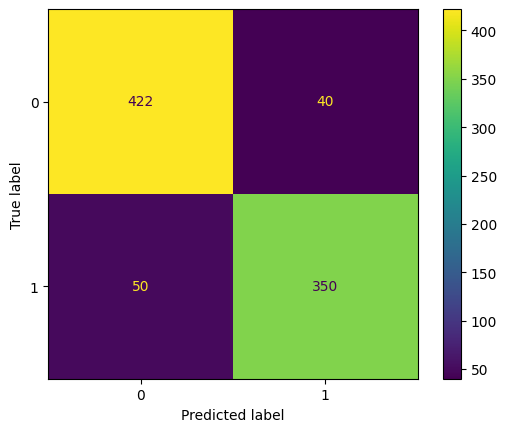

In [76]:
# Logistic regression model

clf = LogisticRegression()
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
accuracy = round(accuracy_score(test_y, y_pred) * 100, 2)
report = classification_report(test_y, y_pred)
print(f"Accuracy: {accuracy}%\n")
print(f"Report: {report}")
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred)).plot()

Accuracy: 86.08%

Report:               precision    recall  f1-score   support

      female       0.85      0.90      0.87       462
        male       0.88      0.81      0.84       400

    accuracy                           0.86       862
   macro avg       0.86      0.86      0.86       862
weighted avg       0.86      0.86      0.86       862



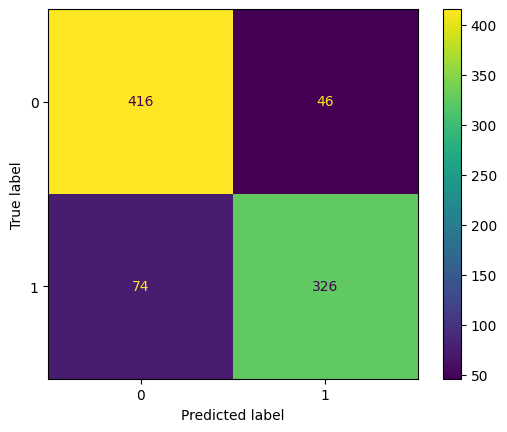

In [77]:
# Perceptron model
clf = Perceptron()
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
accuracy = round(accuracy_score(test_y, y_pred) * 100, 2)
report = classification_report(test_y, y_pred)
print(f"Accuracy: {accuracy}%\n")
print(f"Report: {report}")
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred)).plot()

Accuracy: 68.33%

Report:               precision    recall  f1-score   support

      female       0.68      0.79      0.73       462
        male       0.70      0.56      0.62       400

    accuracy                           0.68       862
   macro avg       0.69      0.68      0.68       862
weighted avg       0.68      0.68      0.68       862



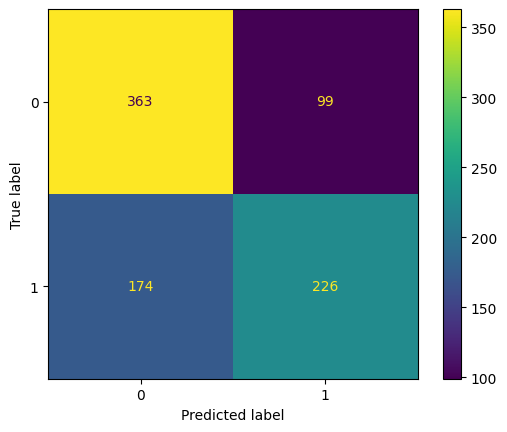

In [78]:
# Naive bayes gaussian model
clf = GaussianNB()
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
accuracy = round(accuracy_score(test_y, y_pred) * 100, 2)
report = classification_report(test_y, y_pred)
print(f"Accuracy: {accuracy}%\n")
print(f"Report: {report}")
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred)).plot()

Accuracy: 83.18%

Report:               precision    recall  f1-score   support

      female       0.82      0.87      0.85       462
        male       0.84      0.78      0.81       400

    accuracy                           0.83       862
   macro avg       0.83      0.83      0.83       862
weighted avg       0.83      0.83      0.83       862



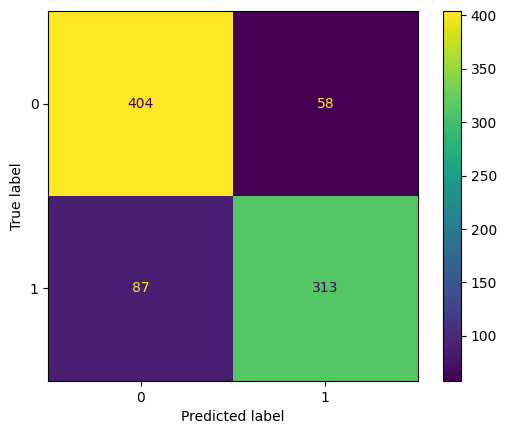

In [79]:
# Naive bayes bernoulli model
clf = BernoulliNB()
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
accuracy = round(accuracy_score(test_y, y_pred) * 100, 2)
report = classification_report(test_y, y_pred)
print(f"Accuracy: {accuracy}%\n")
print(f"Report: {report}")
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred)).plot()

Accuracy: 92.34%

Report:               precision    recall  f1-score   support

      female       0.91      0.95      0.93       462
        male       0.94      0.89      0.91       400

    accuracy                           0.92       862
   macro avg       0.93      0.92      0.92       862
weighted avg       0.92      0.92      0.92       862



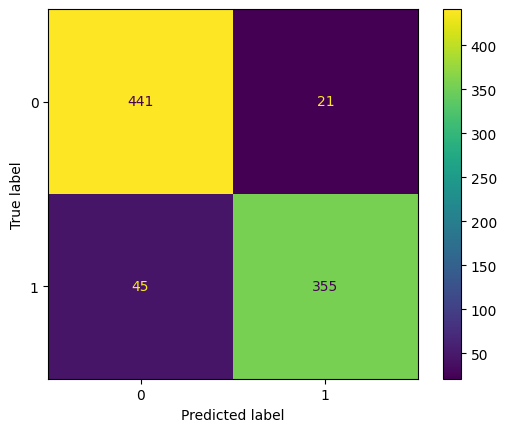

In [80]:
# SVM model, the best performance is reached when kernel=rbf and c=3, which is 93.61%
clf = SVC(C=3, kernel='rbf')
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
accuracy = round(accuracy_score(test_y, y_pred) * 100, 2)
report = classification_report(test_y, y_pred)
print(f"Accuracy: {accuracy}%\n")
print(f"Report: {report}")
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred)).plot()

Accuracy: 86.77%

Report:               precision    recall  f1-score   support

      female       0.82      0.96      0.89       462
        male       0.94      0.77      0.84       400

    accuracy                           0.87       862
   macro avg       0.88      0.86      0.86       862
weighted avg       0.88      0.87      0.87       862



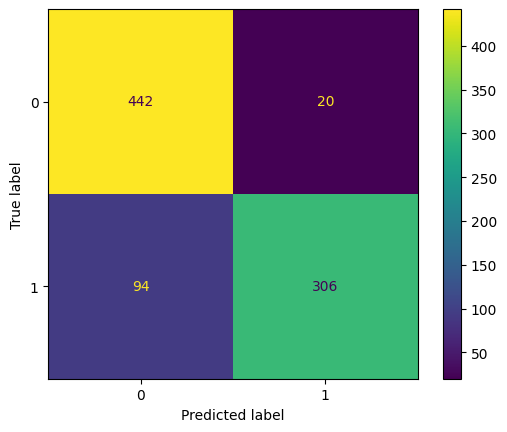

In [81]:
# KNN model, the best performance is reached when k=1 and w=distance, which is 87,37%
clf = KNeighborsClassifier(n_neighbors=1, weights='distance')
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
accuracy = round(accuracy_score(test_y, y_pred) * 100, 2)
report = classification_report(test_y, y_pred)
print(f"Accuracy: {accuracy}%\n")
print(f"Report: {report}")
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred)).plot()

Accuracy: 74.71%

Report:               precision    recall  f1-score   support

      female       0.76      0.78      0.77       462
        male       0.74      0.71      0.72       400

    accuracy                           0.75       862
   macro avg       0.75      0.74      0.75       862
weighted avg       0.75      0.75      0.75       862



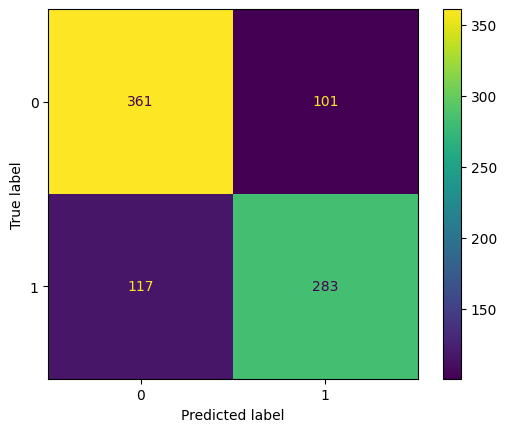

In [82]:
# Decision tree, the best performance is reached when c=gini and d=9, which is a 76,78%
clf = DecisionTreeClassifier(max_depth=9, criterion='gini')
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
accuracy = round(accuracy_score(test_y, y_pred) * 100, 2)
report = classification_report(test_y, y_pred)
print(f"Accuracy: {accuracy}%\n")
print(f"Report: {report}")
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred)).plot()

As we can see from the comparisons made the SVM model is the best one with an outstanding performance of 92.34% accuracy, 91% precision
for females, 94 % precision for males and 95% recall for females and 89% recall for males. For these reasons the SVM will be the one to use in this project. 